In [2]:
import pandas as pd
df = pd.read_csv("c:/data/customer/customer.csv")
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
X=df[df.columns[:-1]]
y=df['Churn']
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample =RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp=pd.DataFrame(data=X_sample,columns=df.columns[:-1])
y_samp = pd.DataFrame(data=y_sample,columns=['Churn'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp['Churn'].value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [5]:
X=df_samp[df_samp.columns[:-1]]
y=df_samp['Churn']

<AxesSubplot:>

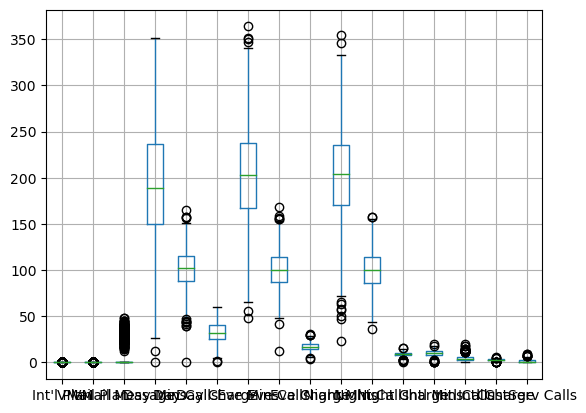

In [6]:
X.boxplot()

In [10]:
import matplotlib.pyplot as plt

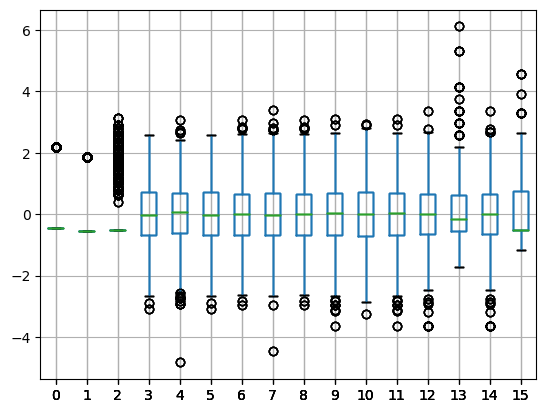

In [11]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.boxplot()
plt.show()

In [12]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
svm = SVC()
n_estimators = 10
model = BaggingClassifier(base_estimator=svm,
n_estimators=n_estimators,
max_samples=1/n_estimators)

In [16]:
import numpy as np
from sklearn.model_selection import cross_val_score
costs = np.logspace(-10, 3, 14) # 10의 -10승부터 10의 3승까지14개
scores = []
for c in costs:
    model.base_estimator.C = c
    #교차검증
    this_scores = cross_val_score(model, X_scaled, y, cv=3)
    m=np.mean(this_scores)
    print(c,'==>',m)
    scores.append(m)
print('max:',max(scores))
print('idx:',np.argmax(scores))
print('C:',costs[np.argmax(scores)])

1e-10 ==> 0.5559006211180124
1e-09 ==> 0.556935817805383
1e-08 ==> 0.5
1e-07 ==> 0.5
1e-06 ==> 0.639751552795031
1e-05 ==> 0.6118012422360248
0.0001 ==> 0.6552795031055901
0.001 ==> 0.5683229813664596
0.01 ==> 0.5900621118012422
0.1 ==> 0.5683229813664596
1.0 ==> 0.7877846790890269
10.0 ==> 0.7991718426501034
100.0 ==> 0.7950310559006212
1000.0 ==> 0.7877846790890269
max: 0.7991718426501034
idx: 11
C: 10.0


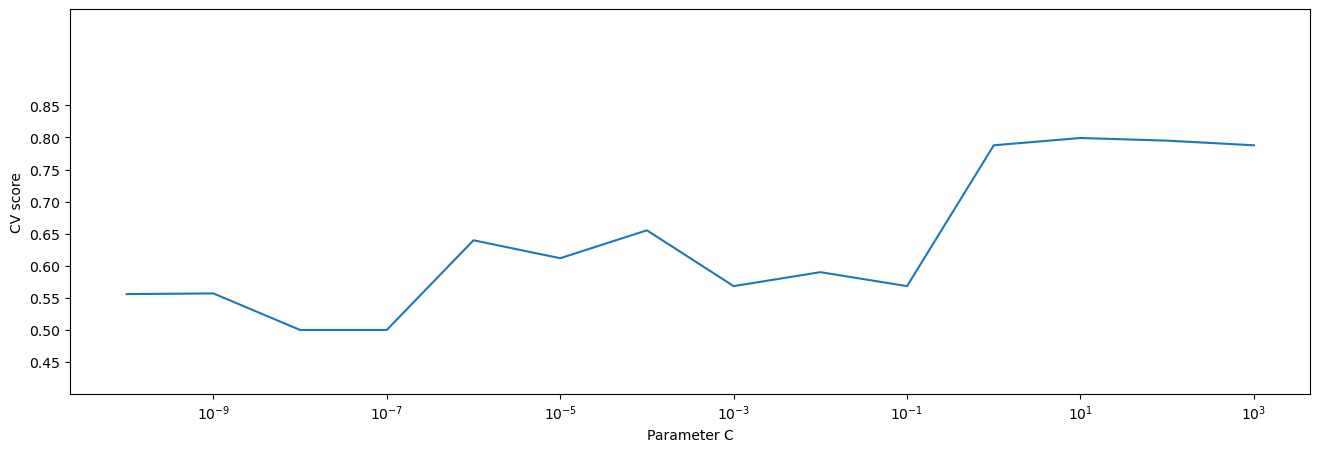

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(16,5)
plt.semilogx(costs, scores)
locs, labels = plt.yticks()
plt.yticks(locs)
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0.4, 1)
plt.show()